In [1]:
%matplotlib inline
import mir_eval, librosa, numpy, matplotlib.pyplot as plt

[&larr; Back to Index](index.html)

# Evaluation using `mir_eval`

`mir_eval` ([documentation](http://craffel.github.io/mir_eval/), [paper](http://colinraffel.com/publications/ismir2014mir_eval.pdf)) is a Python library containing evaluation functions for a variety of common audio and music processing tasks. 

`mir_eval` was primarily created by Colin Raffel. This notebook was created by Brian McFee and edited by Steve Tjoa.

## Why `mir_eval`?

Most tasks in MIR are complicated. Evaluation is also complicated!

Any given task has many ways to evaluate a system. There is no one right away.

For example, here are issues to consider when choosing an evaluation method:

- event matching
- time padding
- tolerance windows
- vocabulary alignment

## `mir_eval` tasks and submodules

- onset, tempo, beat
- chord, key
- melody, multipitch
- transcription
- segment, hierarchy, pattern
- separation (like `bss_eval` in Matlab)

## Install `mir_eval`

    pip install mir_eval

If that doesn't work:

    pip install --no-deps mir_eval

## Example: Onset Detection

In [2]:
y, sr = librosa.load('audio/simple_piano.wav')

In [3]:
# Estimate onsets.
est_onsets = librosa.onset.onset_detect(y=y, sr=sr, units='time')

In [4]:
est_onsets

array([0.27863946, 0.510839  , 0.81269841, 1.021678  , 1.32353741,
       1.50929705, 1.83437642, 2.02013605, 2.36843537, 2.53097506,
       2.87927438, 3.0185941 , 3.36689342, 3.59909297])

In [5]:
# Load the reference annotation.
ref_onsets = numpy.array([0.1, 0.21, 0.3])

In [6]:
mir_eval.onset.evaluate(ref_onsets, est_onsets)

OrderedDict([('F-measure', 0.11764705882352941),
             ('Precision', 0.07142857142857142),
             ('Recall', 0.3333333333333333)])

`mir_eval` finds the largest feasible set of matches using the [Hopcroft-Karp algorithm](https://en.wikipedia.org/wiki/Hopcroft%E2%80%93Karp_algorithm).

## Example: Beat Tracking

In [7]:
est_tempo, est_beats = librosa.beat.beat_track(y=y, sr=sr)
est_beats = librosa.frames_to_time(est_beats, sr=sr)

In [8]:
est_beats

array([0.53405896, 1.021678  , 1.53251701, 2.04335601, 2.53097506])

In [9]:
# Load the reference annotation.
ref_beats = numpy.array([0.53, 1.02])

In [10]:
mir_eval.beat.evaluate(ref_beats, est_beats)

/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/mir_eval/beat.py:91: UserWarning: Reference beats are empty.
  warnings.warn("Reference beats are empty.")
/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/mir_eval/beat.py:93: UserWarning: Estimated beats are empty.
  warnings.warn("Estimated beats are empty.")


OrderedDict([('F-measure', 0.0),
             ('Cemgil', 0.0),
             ('Cemgil Best Metric Level', 0.0),
             ('Goto', 0.0),
             ('P-score', 0.0),
             ('Correct Metric Level Continuous', 0.0),
             ('Correct Metric Level Total', 0.0),
             ('Any Metric Level Continuous', 0.0),
             ('Any Metric Level Total', 0.0),
             ('Information gain', 0.0)])

## Example: Chord Estimation

In [11]:
mir_eval.chord.evaluate()

TypeError: evaluate() missing 4 required positional arguments: 'ref_intervals', 'ref_labels', 'est_intervals', and 'est_labels'

Hidden benefits

- Input validation! Many errors can be traced back to ill-formatted data.
- Standardized behavior, full test coverage.

## More than metrics

mir_eval has tools for display and sonification.

In [12]:
import librosa.display
import mir_eval.display

Common plots: `events`, `labeled_intervals`

pitch, multipitch, piano_roll
segments, hierarchy,
separation

### Example: Events

In [13]:
librosa.display.specshow(S, x_axis='time', y_axis='mel')
mir_eval.display.events(ref_beats, color='w', alpha=0.8, linewidth=3)
mir_eval.display.events(est_beats, color='c', alpha=0.8, linewidth=3, linestyle='--')

NameError: name 'S' is not defined

### Example: Labeled Intervals

### Example: Source Separation

In [14]:
y_harm, y_perc = librosa.effects.hpss(y, margin=8)

/var/folders/2d/k4y79f951rlgktlddvyn8kk80000gp/T/ipykernel_8441/3920060249.py:3: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


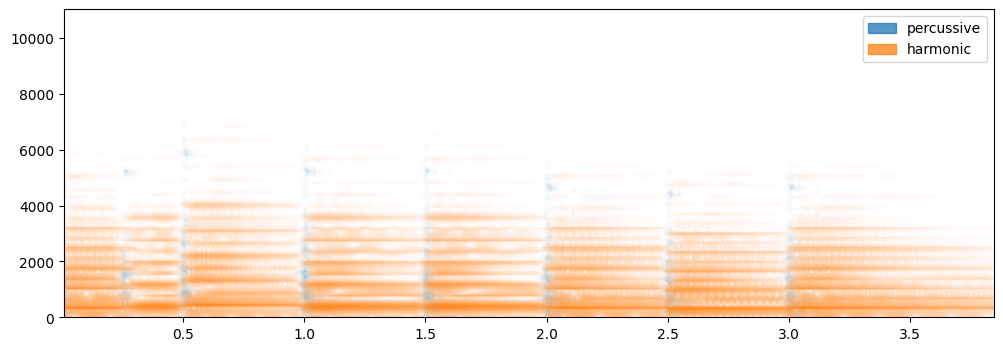

In [15]:
plt.figure(figsize=(12, 4))
mir_eval.display.separation([y_perc, y_harm], sr, labels=['percussive', 'harmonic'])
plt.legend()

In [16]:
Audio(data=numpy.vstack([

SyntaxError: incomplete input (2169252561.py, line 1)

In [ ]:
mir_eval.sonify.chords()

[&larr; Back to Index](index.html)